# Numpy -da copy() , view() , shape() , reshape()

NumPy-də copy() və view() funksiyaları arasındakı fərqi bilməyiniz həqiqətən vacibdir. Əks halda, təsadüfən massivlərin dəyişdirər və nəticədə orijinal massivdəki dataları itirmək kimi problemlərlə qarşılaşa bilərsiniz. Massivin surətinin çıxarılması (kopyalanması) ilə massivin görüntüsü (view) arasındakı əsas fərq ondan ibarətdir ki, copy() yeni massivdir, view() isə sadəcə orijinal massivin görüntüsüdür.

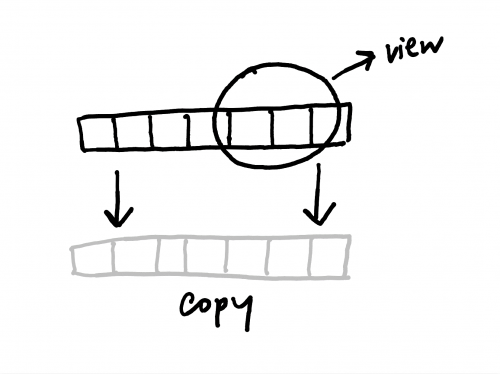

Kopya massiv orijinal massivdəki verilənlərdən ibarətdir və kopya massivdə edilən dəyişikliklər orijinal massivə təsir göstərmir. Eynilə, orijinal massivdə edilən dəyişikliklər dublikat massiləvə təsir göstərmir.

Digər tərəfdən, əgər söhbət massiv view -sundan gedirsə, bu massivdə heç bir məlumat yoxdur və massiv görünütüsünə edilən dəyişikliklər orijinal massivə təsir edir. Eynilə, orijinal massivdə edilən dəyişikliklər görüntüsünə təsir göstərir.

Əslində, orijinal (əsas) massivi görüntü ilə seyr edirmiş kimi düşünə bilərik. Və ya eyni məlumatları paylaşan iki obyekt olduğunu düşünək, lakin iki fərqli obyekt əslində mövcud deyil. view() orijinal massivin bir hissəsi olsa da, onunla çalışdıqda sanki başqa obyektlə işləyirmişik kimi hiss olunur. (shallow copy (və ya səthi kopya )

Digər tərəfdən, copy() orijinal massivdən ayrıca obyekt yaradır, lakin, kopyalandıqdan dərhal sonra hər iki obyekt eyni görünür. (deep copy) (dərin kopya)

İndi massivin surətini çıxaraq, başlanğıcdakı orijinal massivin bir elementini dəyişək və hər iki massivi çap edək. Görək nə olacaq?!

In [3]:
import numpy as np

dizi1 = np.array([1, 3, 5, 7, 9]) # dizi1 --orijinal dizi
dizi2 = dizi1.copy() # dizi2 --orijinal dizinin kopyası
dizi1[0] = 57        # orijinal diziyi değiştirelim

print(dizi1)
print(dizi2) # dizi2 de değişti mi?

[57  3  5  7  9]
[1 3 5 7 9]


Kopya massiv orijinal massivdə edilən dəyişikliklərdən təsirlənmir.<br><br>
İndi massivin view() -ini yaradaq, yuxarıdakı kimi orijinal massivin bir elementini dəyişək. Görək nə olacaq?!

In [4]:
import numpy as np

dizi1 = np.array([1, 3, 5, 7, 9]) # dizi1 --orijinal dizi
dizi2 = dizi1.view() # dizi2 -- orijinal dizinin görünümü
dizi1[0] = 57        # orijinal diziyi değiştirelim

print(dizi1)
print(dizi2) # dizi2 de değişti mi?

[57  3  5  7  9]
[57  3  5  7  9]


Gördüyünüz kimi, view() massivi orijinal massivdə edilən dəyişikliklərdən TƏSİRLƏNİR. Beləliklə, view() massivindəki dəyişiklik orijinal massivə təsir edirmi? Nəzər yetirək:

In [5]:
import numpy as np

dizi1 = np.array([1, 3, 5, 7, 9]) # dizi1 --orijinal dizi
dizi2 = dizi1.view()  # dizi2 -- orijinal dizinin görünümü
dizi2[0] = 57         # görünüm diziyi değiştirelim

print(dizi1) # dizi1 de değişti mi?
print(dizi2) 

[57  3  5  7  9]
[57  3  5  7  9]


Orijinal massiv view() -dəki dəyişikliklərdən təsirlənir.

Massivin datası var, ya yox?
Daha əvvəl qeyd etdiyim kimi, copy() massivlər verilənlərə sahibdirlər, lakin view() massivləri verilənlərə sahib deyil, Bəs bunu necə yoxlaya bilərik?

<b>base</b> atributu massivin özünün verilənləri olub-olmadığını yoxlamaq üçün istifadə olunur. Başqa sözlə, əgər NumPy massivinin özünün verilənləri varsa, base atributu <b>None</b> qaytarır və əgər massivin özünün verilənləri yoxdursa, base atributu orijinal obyekti göstərir.

In [6]:
# base ile veri kontrolü
import numpy as np

dizi = np.array([1, 3, 5, 7, 9])

adana = dizi.copy()
bursa = dizi.view()

print(adana.base)
print(bursa.base)

None
[1 3 5 7 9]


Yuxarıdakı misalda göründüyü kimi, copy() ilə yaradılmış adana massivi base atributla <b>None</b> qaytardı. Digər tərəfdən, view() ilə yaradılmış bursa massivi base atributu ilə orijinal massivi qaytardı. Bu o deməkdir ki, adana massivinin öz datası var, bursa massivinin öz datası yoxdur.

<p><span style="color: rgb(41, 41, 41); font-family: Heebo, -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Roboto, &quot;Helvetica Neue&quot;, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 18.4px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: left; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; background-color: rgb(248, 249, 250); text-decoration-thickness: initial; text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;">Xülasə
        olaraq, view() və copy() arasındakı əsas fərqlər bunlardır:</span></p>
    <ol>
      <li style="box-sizing: border-box; margin: 0px 0px 1.5rem; counter-increment: parent-counter 1; position: relative; cursor: default;">Massivin
        dəyişdirilməsi: view() -in dəyişdirilməsi orijinal massivi dəyişdirir,
        copy() -ın dəyişdirilməsi isə orijinal massivi dəyişmir.</li>
      <li style="box-sizing: border-box; margin: 0px 0px 1.5rem; counter-increment: parent-counter 1; position: relative; cursor: default;">Keçən
        vaxt: copy() əməliyyatı adətən 1,5-2 dəfə daha uzun çəkə bilir.</li>
      <li style="box-sizing: border-box; margin: 0px 0px 1.5rem; counter-increment: parent-counter 1; position: relative; cursor: default;">Massivin
        əsası (base): Bir view() , orijinal massivlə eyni təmələ malikdir. Onun
        bir kopyasını almır.</li>
      <li style="box-sizing: border-box; margin: 0px 0px 1.5rem; counter-increment: parent-counter 1; position: relative; cursor: default;">Yaddaşdan
        istifadə: Bir view() orijinal massivlə aynı yaddaş adresinde (id) yer
        tutar. Lakin, bir copy() orijinal massivlə eyni yaddaş adresinde yer
        almır.</li>
    </ol>

<b>Copy() və View() arasındakı fərq niyə bu qədər vacibdir?</b>
<br>İlk olaraq ehtiyacınız olanda bir copy() yaratmasanız, probleminiz olacaq.

Deyək ki, bazar ertəsindən cümə gününə qədər bir sıra bağlanış qiymətlərimiz olan müxtəlif fond ehtiyatlarınız var, lakin buradakı bəzi dəyərlərin səhv ola biləcəyini düşünürük. Tutaq ki, hər bir sətirdə hissə sənədi qiymətləri var və hər sütun gündəlik məlumatlara uyğundur. Orijinal məlumatın surətini saxlayaraq (məsələn, ikisi arasındakı təxminlərdəki fərqləri müqayisə etmək və ya sadəcə surətini saxlamaq üçün) "Stock 0" qiymətlərinə düzəlişlər etmək istəyirik.
<br><br>
Ümumiyyətlə, verilənlərin orijinalını deyil, surətini redaktə etmək istədiyiniz zaman biz np.copy() funksiyasından istifadə edirik. Bu surət çıxarmağımızı təmin etməyin ən təhlükəsiz yoludur. Əks halda view() daha yaxşı olardı və həm də vaxta və yaddaşa qənaət edərdi.

Daha əvvəl dediyim kimi kopyalama 1.5x-2x daha yavaşdır və daha çox yaddaş istifadə edir. Ancaq bu, adətən problem olaraq görülmür. Nəticə olaraq, np.copy() metodu surət çıxarmağın yeganə yolu deyil. Çox vaxt kopyalama dolayı yolla edilir. Məsələn: X + = 2 * Y etdikdə, əslində 2 * Y və X + 2 * Y iki kopya yaradırıq.

Digər tərəfdən, vaxta və yaddaşa qənaət etmək üçün hər dəfə view() funksiyasından istifadə etməyi məntiqli hesab etmək düzgün deyil. Performans və kodun nə qədər oxunaqlı olması arasında tarazlıq olmalıdır. Sadə gündəlik datalarda və ya vəziyyətlərdə bu qədər optimallaşdırma haqqında düşünmək eləcə də etmək lazım deyil.

#### Numpy Massivlərində Shape
Massivin shape massivin hər ölçüsündə olan elementlərin sayıdır (ölçü, məsələn, 1D, 2D).

NumPy massivlərində shape atributu hər bir indeksə uyğun elementlərin sayını ifadə edən bir tuple qaytarar.

In [1]:
# bir dizinin shape'ini almak
import numpy as np

dizi = np.array([[1, 3, 5, 7, 9], [2, 4, 6, 8, 10]])

print(dizi.shape) # 2D bir dizinin shape'ini yazdıralım

(2, 5)


Yuxarıdakı misalda (2, 5) dəyəri qaytarılır. Bu o deməkdir ki, massiv 2 ölçülüdür və hər ölçüdə 5 element var.

Gəlin 1, 2, 3, 4 dəyərlərə malik vektor və ndmin istifadə edərək 3D massivi yaradaq və yekunda shapenin son ölçüsün 4 dəyəri olduğunu yoxlayaq:

In [12]:
import numpy as np
dizi = np.array([1, 2, 3, 4], ndmin=3)

print(dizi)
print(dizi.shape)

[[[1 2 3 4]]]
(1, 1, 4)


Yuxarıdakı nümunədə dəyər (1, 1, 4) qaytarılır. Buna shape tuple deyilir. Bu o deməkdir ki, hər bir indeksdə tam ədədlər və ona müvafiq Dimension -dakı olan elementlərin sayını təmsil edir. Nümunədə 2-ci indeksdə 4 dəyərimiz var, ona görə deyə bilərik ki, 3-cü ölçüdə 4 element var.

#### Numpy Massivlərində Reshape
Reshape (Yenidən formalaşdırma) massivin shape -sini dəyişdirər. Massivin shape -si massivin hər ölçüsündə olan elementlərin sayını ifadə edər.Reshape massivə yeni ölçü əlavə etmək və ya mövcud ölçüləri silmək eləcə də hər ölçüdə elementlərin sayını dəyişdirmək üçün istifadə edilər.

Məsələn, 12 elementli 1-D (1-Ölçü) massivi 2-D massivə çevirək. Yaranan yeni massivdə hər birində 3 elementdən ibarət 4 massiv olar.

In [13]:
# reshape 1-D den 2-D ye
import numpy as np

aylar = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

uc_aylar = aylar.reshape(4, 3)

print(uc_aylar)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


Yuxarıdakı misaldakı 12 elementli 1-D massivi 3-ölçülü massiləyə çevirək. Yaranan yeni massivdə hər birində 2 element olan 3 massivdən ibarət 2 massiv var. Beyninizdə isinməni hiss etməyə başlayırsınız? Sakit olaq və davam edək. ( ͡ᵔ ‿ ͡ᵔ)

In [15]:
# reshape 1-D den 3-D ye
import numpy as np

dizi = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

yeni_dizi = dizi.reshape(2, 3, 2)

print(yeni_dizi)

[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]]


Aşağıdakı şəkilləri araşdıraraq yuxarıdakı nümunədəki 3-D massivinin yeni shape -sini təxmin edə bilərsinizmi?

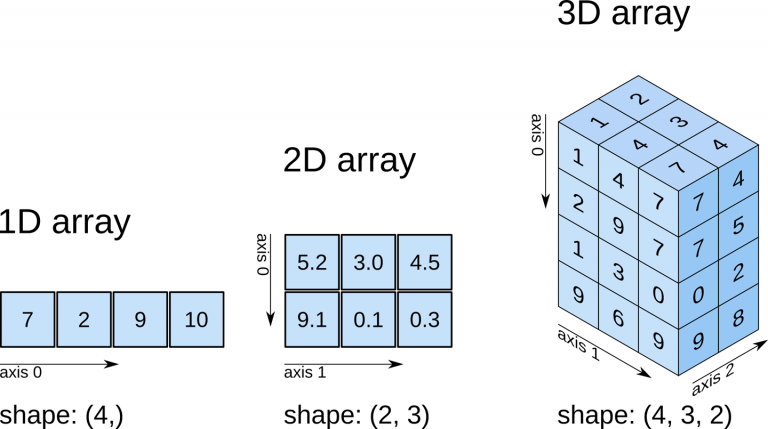

Bunu bilmək yaxşıdır!<br> 3 ölçülü massivlər (x, y, z) kimi ifadə edilir. Burada x hündürlük, y eni, z isə dərinlik deməkdir. Daha ətraflı məlumat üçün <a href="https://www.construct.net/en/tutorials/arrays-beginners-170/3-dimensional-arrays-5">keçid edin.</a></p>


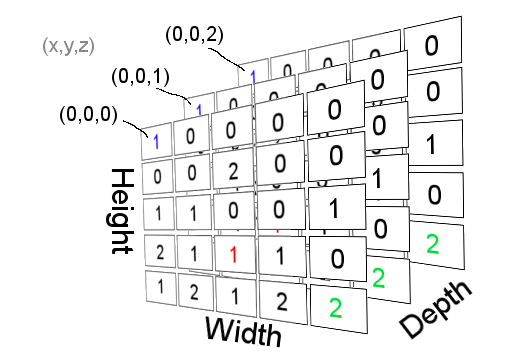

Reshape prosesində nəzərə alınacaq bir məsələ: Reshape üçün tələb olunan elementlər hər iki halda bərabər olmalıdır. Misal üçün, Biz 2D massivdə 8 elementdən ibarət 1D massivi 2 cərgədə 4 elementlə yenidən formalaşdıra bilərik. Lakin 3 cərgədə 3 elementdən ibarət 2D massivdə onu yenidən formalaşdıra bilmərik. Çünki, 3×3 = 9 element tələb edəcəyi üçün 8 element sayı buna kifayət etməyəcəkdir.

In [2]:
# reshape için gerekli elemanlar her iki şekilde de eşit olmalıdır
import numpy as np

dizi = np.array([1, 2, 3, 4, 5, 6, 7, 8])

yeni_dizi = dizi.reshape(3, 3)

print(yeni_dizi)

ValueError: cannot reshape array of size 8 into shape (3,3)

Reshape ilə yaradılmış yeni massiv nə cür copy() massivimi yoxsa, view() massivimi kimi fəaliyyət göstərir? Bu sualın cavabı: Aşağıdakı nümunədə göstərildiyi kimi, reshape orijinal massivi qaytarır, ona görə də yeni massiv orjinalın view() -sudur.

In [17]:
# Reshape ile oluşturulan yeni dizi copy dizi mi olur view mi olur?
import numpy as np

dizi = np.array([1, 2, 3, 4, 5, 6, 7, 8])

print(dizi.reshape(2, 4).base)

[1 2 3 4 5 6 7 8]


Bilinməyən Ölçü<br>
Sizdə "naməlum" ölçü ola bilər. Bu nə deməkdir? Bu o deməkdir ki, Reshape metodunda ölçülərdən biri üçün tam ədəd göstərməyə bilərsiniz. -1 dəyərini verin və NumPy sizin üçün bu ədədi hesablayacaq. Lakin burada qeyd etmək lazımdır ki, biz -1 -i birdən çox ölçüyə verə bilmərik, onu yalnız bir ölçüdə istifadə edə bilərik.

8 elementli 1D massivi 2×2 elementli 3D massivinə çevirək:

In [18]:
# bilinmeyen boyut
# 8 elemanlı 1D dizisini 2x2 elemanlı 3D diziye dönüştürelim

import numpy as np

dizi= np.array([1, 2, 3, 4, 5, 6, 7, 8])

yeni_dizi = dizi.reshape(2, 2, -1) # -1 bilinmeyen boyut yerine

print(yeni_dizi)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


Flattening <br><br>
Flattening çoxölçülü massivi 1D massivə çevirmək deməkdir. Bunu etmək üçün reshape (-1) istifadə edə bilərik.

In [19]:
# flattening
# Çok boyutlu diziyi tek boyuta indirme
import numpy as np

dizi = np.array([[1, 3, 5, 7], [2, 4, 6, 8]])

yeni_dizi = dizi.reshape(-1)

print(yeni_dizi)

[1 3 5 7 2 4 6 8]


Numpy’da massivlərin shape -sini dəyişmək üçün <b>flatten, ravel</b> kimi əməllərlə yanaşı massiv elementlərini yeniden formalaşdırmaq və ya dəyişmək üçün <b>rot90, flip, fliplr, flipud</b> kimi əməllər də var.

<p><strong>Kaynaklar:</strong><a href="https://www.jessicayung.com/numpy-views-vs-copies-avoiding-costly-mistakes/"> https://www.jessicayung.com/numpy-views-vs-copies-avoiding-costly-mistakes/, </a><a href="https://www.w3schools.com/python">https://www.w3schools.com/python , </a><a href="https://www.datasciencearth.com/numpyda-copy-view-shape-reshape-bolum-8/">NumPy’da Copy, View, Shape, Reshape – Bölüm 8</a></p>
<p>Bu bölümün&nbsp;<a href="https://github.com/ekren57/Python-Egitim-Serisi?files=1">Github resursları</a>&nbsp;üçün keçid edin.</p>